# Atividade 05 - Inteligência Computacional
## Fabiano Dicheti

#### Aplicar um classificador na base de dados Iris normalizada, avaliando sua acurácia em conjuntos de treinamento e teste.

 ### K-Means
 #### Algoritmo de aprendizado não supervisionado que busca similaridades entre os dados e tenta agrupá-los conforme o número de clusters/grupos definidos pelo argumento "k", onde, a semelhanca entre os pontos é calculada por uma função de distância.

## Importando bibliotecas ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA
from IPython.display import Image

## Carregando a base de dados iris

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


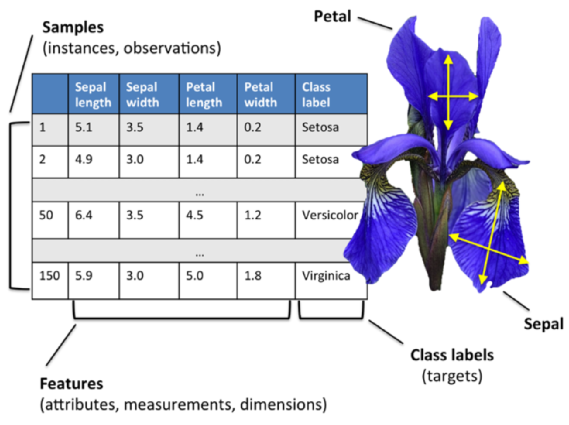

In [4]:
Image(filename ="iris-data-set.png", width=500, height=500)

## Normalizando o Dataframe

In [5]:
def normalize(df):
    resultado = df.copy()
    for coluna in df.columns:
        if type(df[coluna][1]) != str:
            max_valor = df[coluna].max()
            min_valor = df[coluna].min()
            resultado[coluna] = (df[coluna] - min_valor) / (max_valor - min_valor)
    return resultado

df = normalize(iris)

#### Guardando os valores originais e atualizando o dataframe

In [6]:
chave_normalizacao = iris # gambiarra para escalar a predicao 
iris = df

In [7]:
iris.head()


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


#### Visualização  do dataset antes e depois da normalização

In [8]:
rotulos = []
for linha, coluna in iris.iterrows():
    if coluna['Species'] == 'Iris-virginica':
        rotulos.append(0)
    elif coluna['Species'] == 'Iris-setosa':
        rotulos.append(1)
    elif coluna['Species'] == 'Iris-versicolor':
        rotulos.append(2)

<IPython.core.display.Javascript object>


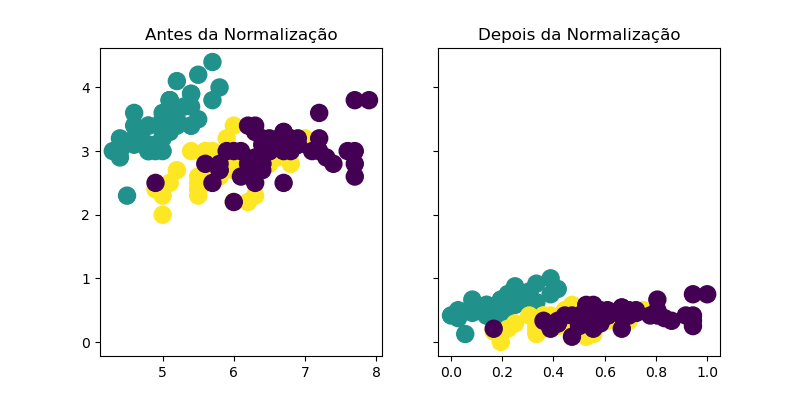

In [9]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))
ax1.set_title('Antes da Normalização')
ax1.scatter(chave_normalizacao['SepalLength'], chave_normalizacao['SepalWidth'],s=150, c=rotulos)
ax2.set_title('Depois da Normalização')
ax2.scatter(iris['SepalLength'], iris['SepalWidth'],s=150, c=rotulos)

## Separando os valores de dados e classes

In [10]:
X = iris.drop('Species',axis=1)
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [11]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Análise da Componente Principal

In [12]:
pca = PCA()
X_iris = pca.fit_transform(X)
pca.get_covariance()
variancias = pca.explained_variance_ratio_
variancias

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

In [13]:
# No caso, das 4 componentes listadas, vou considerar apenas as 3 primeiras
# descartar o 0.006
pca = PCA(n_components=3)
X_iris = pca.fit_transform(X)

## Convertendo valores categórios de classe em numéricos

In [14]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [15]:
y = y.apply(converte_classe)
y.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

## Inicialização Aleatória, Instânciando o Algoritmo K-means com 3 clusters ##

In [16]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [17]:
kmeans.fit(X_iris)

KMeans(n_clusters=3)

## Centroides ##

#### Pontos centrais dos clusters, que servirão para calcular a distância entre os dados 

In [18]:
kmeans.cluster_centers_

array([[ 0.15033267, -0.12192287, -0.00470709],
       [-0.61793459,  0.0687501 ,  0.00066288],
       [ 0.55708812,  0.10255872,  0.00651252]])

## Tabela de distância (Euclidiana) ##

In [19]:
distancia = kmeans.fit_transform(X_iris)
distancia

array([[1.18771607, 0.04794285, 0.8149518 ],
       [1.19913766, 0.17577572, 0.77534155],
       [1.23608234, 0.12875836, 0.82394228],
       [1.22847864, 0.1732618 , 0.80585368],
       [1.20590339, 0.07690985, 0.83996948],
       [1.10786261, 0.24104644, 0.8010768 ],
       [1.2197643 , 0.11415906, 0.82414868],
       [1.18360838, 0.01689925, 0.79729872],
       [1.26973569, 0.27419897, 0.83131779],
       [1.21640136, 0.14787671, 0.80052342],
       [1.16116463, 0.16173115, 0.82314992],
       [1.19789734, 0.0461046 , 0.80552016],
       [1.2394622 , 0.19319299, 0.81412057],
       [1.33789316, 0.27577288, 0.90579617],
       [1.19328454, 0.3269856 , 0.90762203],
       [1.18321266, 0.45696192, 0.95029824],
       [1.14984731, 0.2346927 , 0.83940152],
       [1.16053745, 0.04543256, 0.78905392],
       [1.09577218, 0.25383398, 0.78978592],
       [1.1753027 , 0.16192262, 0.83781161],
       [1.11911594, 0.11818469, 0.74886504],
       [1.13956496, 0.13665471, 0.7932198 ],
       [1.

In [20]:
distancia[0]

array([1.18771607, 0.04794285, 0.8149518 ])

## Visualizando valores de distância para cada cluster ##

<IPython.core.display.Javascript object>


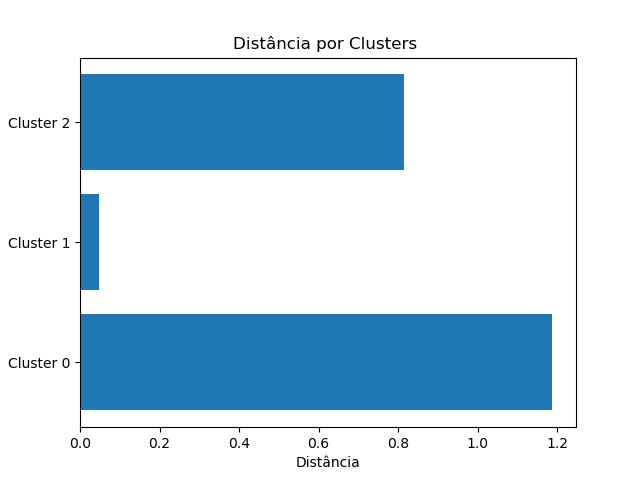

In [21]:
%matplotlib notebook
X = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(X,distancia[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

## Imprimindo Rótulos ##

In [22]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## Visualizando os Centroides ##

<IPython.core.display.Javascript object>


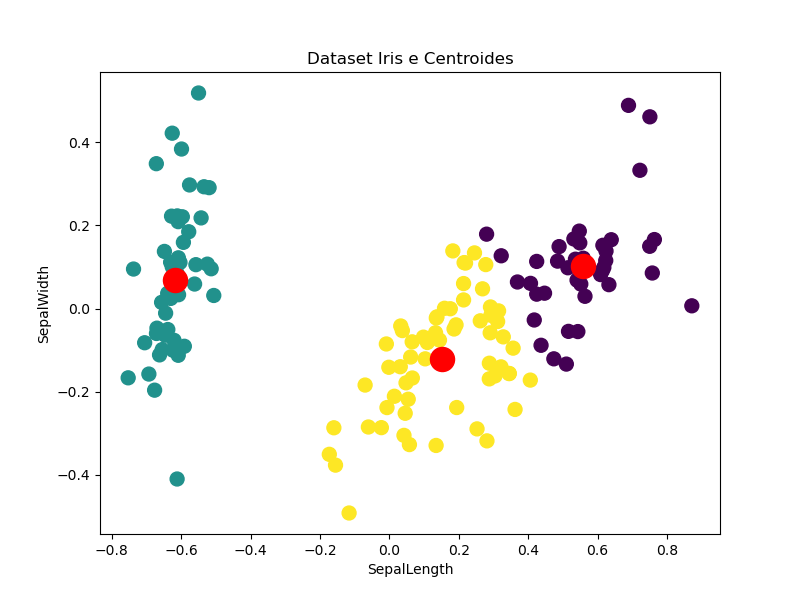

In [23]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X_iris[:, 0], X_iris[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroides')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados ##

In [24]:
novos_dados = [
        [ 4.12, 3.4, 1.6],
        [ 5.2, 5.8, 5.2],
        [ 3.1, 3.5, 3.3]
    ]


### Escalando os novos dados

In [25]:
# aqui a gambiarra la do inicio
for i in novos_dados:
    col0 = chave_normalizacao['SepalLength']
    col1 = chave_normalizacao['SepalWidth']
    col2 = chave_normalizacao['PetalLength']
    #col3 = chave_normalizacao['PetalWidth']
    i[0] = (i[0] - col0.min()) / (col0.max() - col0.min()) 
    i[1] = (i[1] - col1.min()) / (col1.max() - col1.min()) 
    i[2] = (i[2] - col2.min()) / (col2.max() - col2.min()) 
    #i[3] = (i[3] - col3.min()) / (col3.max() - col3.min()) 

In [26]:
novos_dados

[[-0.04999999999999991, 0.5833333333333333, 0.1016949152542373],
 [0.25000000000000006, 1.583333333333333, 0.711864406779661],
 [-0.3333333333333332, 0.6249999999999999, 0.38983050847457623]]

In [27]:
kmeans.predict(novos_dados)

array([2, 0, 1], dtype=int32)

## Visualizando os resultados ##

<IPython.core.display.Javascript object>


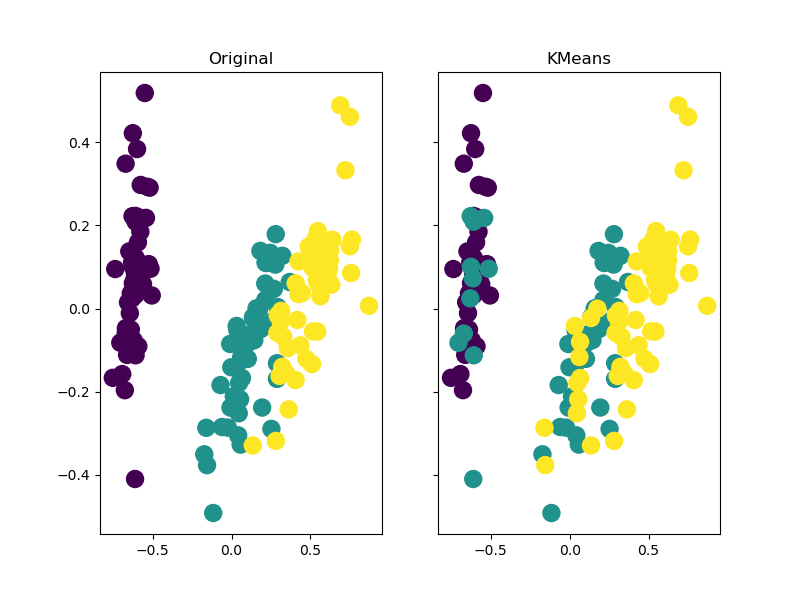

In [29]:
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X_iris[:, 0], X_iris[:, 1],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X_iris[:, 0], X_iris[:, 1],s=150,c=sorted(kmeans.labels_))

## Estimando o valor do parametro K - Curva Joelho (Elbow)

#### A primeira "dobra" aparece com 2 clusters, e "dobra" final é observada com 3 grupos.

1 40.87691963014695
2 11.88415681859686
3 6.746281529292703
4 5.28793498746086
5 4.321815941271597
6 3.690616950121644
7 3.3938975188365155
8 2.9077793082097045
9 2.6518730191207216
10 2.368122242392054


<IPython.core.display.Javascript object>


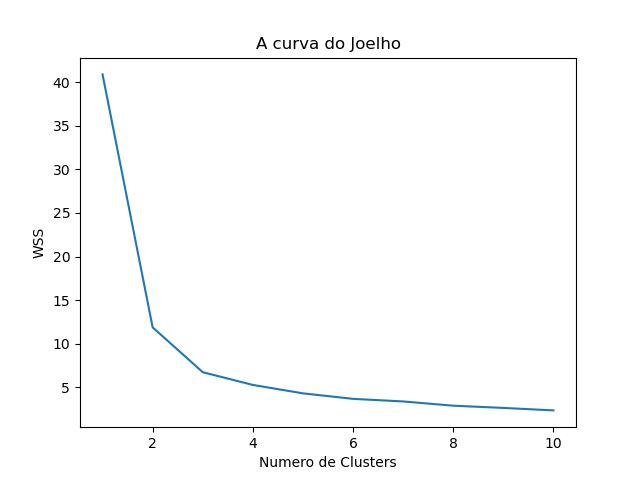

In [31]:
%matplotlib notebook
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X_iris)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('A curva do Joelho')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') # do ingles: within cluster sum of squares = dentro da soma dos quadrados do cluster
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [32]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        36   0  14   50
1         0  50   0   50
2         3   0  47   50
All      39  50  61  150


#### classe 0 = 72%    ->  Iris-virginica
#### classe 1 = 100%  ->  Iris-setosa
#### classe 2 = 94%    ->  Iris-versicolor

### Metricas de classificação

In [33]:
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.92      0.72      0.81        50
   Cluster 1       1.00      1.00      1.00        50
   Cluster 0       0.77      0.94      0.85        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



### comparando com o processo sem PCA
#### Conclui-se que Neste experimento, a performance foi melhor com PCA.

In [35]:
novos_dados = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]

kmeans.fit(iris.drop('Species',axis=1))
kmeans.cluster_centers_
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
kmeans.fit(iris.drop('Species',axis=1))
kmeans.cluster_centers_
distancia = kmeans.fit_transform(iris.drop('Species',axis=1))
labels = kmeans.labels_
kmeans.predict(novos_dados)
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        14   0  36   50
1         0  50   0   50
2        47   0   3   50
All      61  50  39  150
